In [1]:
# Importing dependencies
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from splinter import Browser
from bs4 import BeautifulSoup
from webdriver_manager.chrome import ChromeDriverManager

In [2]:
# Setting up Splinter
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

[WDM] - Downloading: 100%|████████████████████████████████████████████████████████| 6.46M/6.46M [00:00<00:00, 18.9MB/s]


In [3]:
# scraping the site and parsing 
url="https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html"
browser.visit(url)
html=browser.html
soup=BeautifulSoup(html,'html.parser')

In [4]:
# Finding the table
table=soup.find('table',class_='table')

In [5]:
data_rows=[]
rows=table.find_all('tr', class_='data-row')
for row in rows:
    data=row.find_all('td')  
    data_list=[]
    for i in data:
        data_list.append(i.text)
    data_rows.append(data_list)
data_rows

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'],
 ['171', '2012-09-04', '29', '166', '6', '-75.0',

In [6]:
mars_header=table.find_all('th')
columns_list=[]
for head in mars_header:
    columns=head.text
    columns_list.append(columns)
columns_list

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

In [7]:
mars_df=pd.DataFrame(data_rows,columns=columns_list)
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [8]:
mars_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [9]:
mars_df=mars_df.astype({'id':'int'})
mars_df.dtypes

id                   int32
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [10]:
mars_df=mars_df.astype({'sol':'int'})
mars_df.dtypes

id                   int32
terrestrial_date    object
sol                  int32
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [11]:
mars_df['terrestrial_date']=pd.to_datetime(mars_df['terrestrial_date'])
mars_df.dtypes

id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                          object
month                       object
min_temp                    object
pressure                    object
dtype: object

In [12]:
mars_df=mars_df.astype({'ls':'int'})
mars_df.dtypes

id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                       object
min_temp                    object
pressure                    object
dtype: object

In [13]:
mars_df=mars_df.astype({'month':'int'})
mars_df.dtypes

id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                    object
pressure                    object
dtype: object

In [14]:
mars_df=mars_df.astype({'min_temp':'float'})
mars_df.dtypes

id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                    object
dtype: object

In [15]:
mars_df=mars_df.astype({'pressure':'float'})
mars_df.dtypes

id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

In [16]:
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [17]:
# no of months in Mars
months=mars_df["month"].max()
months

12

In [22]:
# month that has the average lowest temp
temp_df=mars_df.groupby("month").mean()
temp_df

,id,sol,ls,min_temp,pressure
month,,,,,
1,1013.873563,1077.574713,15.281609,-77.160920,862.488506
2,1109.882022,1175.853933,44.258427,-79.932584,889.455056
3,1132.697917,1204.406250,75.010417,-83.307292,877.322917
4,1175.164948,1244.500000,104.365979,-82.747423,806.329897
5,1115.033557,1182.691275,132.885906,-79.308725,748.557047
6,735.306122,750.829932,164.897959,-75.299320,745.054422
7,714.549296,715.105634,194.894366,-72.281690,795.105634
8,718.078014,795.333333,224.347518,-68.382979,873.829787
9,785.843284,861.186567,254.052239,-69.171642,913.305970


In [21]:
# month with min temp
mintemp=temp_df["min_temp"].min()
min_month_temp=temp_df.loc[temp_df["min_temp"]==mintemp]
min_month_temp

,id,sol,ls,min_temp,pressure
month,,,,,
3,1132.697917,1204.40625,75.010417,-83.307292,877.322917


In [24]:
# month with max temp
maxtemp=temp_df["min_temp"].max()
max_month_temp=temp_df.loc[temp_df["min_temp"]==maxtemp]
max_month_temp

,id,sol,ls,min_temp,pressure
month,,,,,
8,718.078014,795.333333,224.347518,-68.382979,873.829787


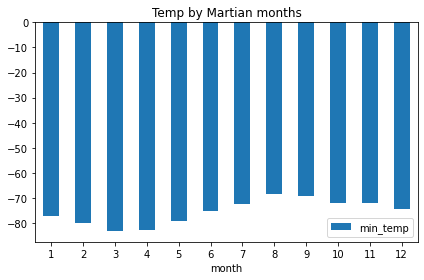

In [27]:
# Plot monthly temp
temp_df.plot.bar(y='min_temp', rot=0, title='Temp by Martian months')
plt.savefig('Resources/Temp_Mars_monthly.jpg')
plt.tight_layout()

In [28]:
# month that has the average lowest atmospheric pressure
minpress=temp_df["pressure"].min()
min_month_press=temp_df.loc[temp_df["pressure"]==minpress]
min_month_press

,id,sol,ls,min_temp,pressure
month,,,,,
6,735.306122,750.829932,164.897959,-75.29932,745.054422


In [29]:
# month that has the average highest atmospheric pressure
maxpress=temp_df["pressure"].max()
max_month_press=temp_df.loc[temp_df["pressure"]==maxpress]
max_month_press

,id,sol,ls,min_temp,pressure
month,,,,,
9,785.843284,861.186567,254.052239,-69.171642,913.30597


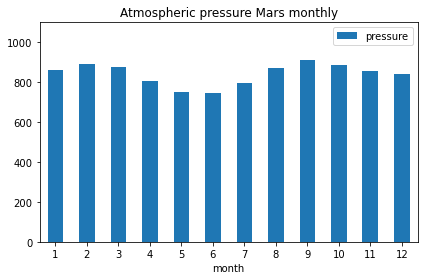

In [30]:
# Plot monthly pressure
temp_df.plot.bar(y='pressure', rot=0, title='Atmospheric pressure Mars monthly')
plt.ylim([0,1100])
plt.savefig('Resources/Pressure_Mars_monthly.jpg')
plt.tight_layout()

In [31]:
# for checking how many terrestial days exist in a MAritian year
mars_year=mars_df[["terrestrial_date", "id"]]
mars_year

,terrestrial_date,id
0,2012-08-16,2
1,2012-08-17,13
2,2012-08-18,24
3,2012-08-19,35
4,2012-08-20,46
...,...,...
1862,2018-02-23,1889
1863,2018-02-24,1892
1864,2018-02-25,1894
1865,2018-02-26,1893


In [20]:
# no of terrestrial days
mars_df.describe()

,id,sol,ls,month,min_temp,pressure
count,1867.000000,1867.000000,1867.000000,1867.000000,1867.000000,1867.000000
mean,955.551152,1015.670059,168.865024,6.141939,-76.121050,841.066417
std,545.048507,565.342298,105.599153,3.506493,5.504098,54.253226
min,2.000000,10.000000,0.000000,1.000000,-90.000000,727.000000
25%,489.500000,546.500000,78.000000,3.000000,-80.000000,800.000000
50%,959.000000,1028.000000,160.000000,6.000000,-76.000000,853.000000
75%,1425.500000,1505.500000,257.500000,9.000000,-72.000000,883.000000
max,1895.000000,1977.000000,359.000000,12.000000,-62.000000,925.000000


In [44]:
mars_year.head()

,terrestrial_date,id
0,2012-08-16,2
1,2012-08-17,13
2,2012-08-18,24
3,2012-08-19,35
4,2012-08-20,46


In [45]:
mars_year.tail()

,terrestrial_date,id
1862,2018-02-23,1889
1863,2018-02-24,1892
1864,2018-02-25,1894
1865,2018-02-26,1893
1866,2018-02-27,1895


In [36]:
# export dataframe to csv file
mars_df.to_csv("Resources/Mars.csv", index=False)